Computational Physics Final Project- Evie Mangan

Unique Parameters:
- infectious rate: 60%
- mortality rate: 5%

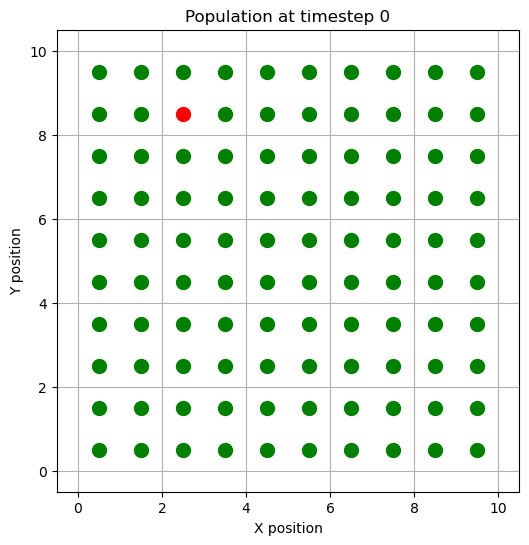

In [13]:
# Graphing the Grid- issue to note: if I run this cell AFTER running the simulation, I can't get it to provide the 
#    grid at time = 0... that's why this cell is before the simulation. I got it to work but I'm sure there is a 
#    more streamlined way of doing it...

def plot_population(positions, infected, immune, dead, grid_size, timestep=None):
    plt.figure(figsize=(6, 6))
    for i in range(len(positions)):
        if dead[i]:
            color = 'black'
            marker = 'x'
        elif infected[i]:
            color = 'red'
            marker = 'o'
        elif immune[i]:
            color = 'blue'
            marker = 'o'
        else:
            color = 'green'
            marker = 'o'

        plt.scatter(positions[i][0], positions[i][1], c=color, marker=marker, s=100)

    plt.xlim(0, grid_size)
    plt.ylim(0, grid_size)
    plt.title(f"Population at timestep {timestep}" if timestep is not None else "Population State")
    plt.grid(True)
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-0.5, grid_size + 0.5)
    plt.ylim(-0.5, grid_size + 0.5)
    plt.show()
    
plot_population(positions, infected, immune, dead, grid_size, timestep=0)

In [56]:
# Trial without masking addition

import numpy as np
import matplotlib.pyplot as plt
import time

# simulation parameters 
pop_size = 100             # number of people/population size
grid_size = 10             # grid size is 10x10 (the "box" my people are in)
timesteps = 500            # number of time steps to simulate (500 seems to be plenty based off final plot)
interaction_radius = 0.5   # how close people need to be to "interact"

# my individual parameters 
infectious_rate = 0.60     # 60% chance to infect if exposed
mortality_rate = 0.05      # 5% chance to die during infection
recovery_time = 100        # recover after 100 time steps

# lists to store properties of each person
positions = []          # [x, y]
velocities = []         # [vx, vy]
infected = [False] * pop_size
immune = [False] * pop_size
dead = [False] * pop_size
infection_timer = [0] * pop_size

side = int(np.sqrt(pop_size))  # assumes square root is exact
spacing = grid_size / side
margin = spacing / 2           # offset to avoid placing on borders- fixes issue of my people being right on the border

for i in range(pop_size):
    # Center people in grid cells with margin from the walls
    x = (i % side) * spacing + margin
    y = (i // side) * spacing + margin
    positions.append([x, y])

    # Assign small random velocities
    vx, vy = (np.random.randn(2) / 8).tolist()
    velocities.append([vx, vy])

initial_patient = np.random.randint(pop_size)
infected[initial_patient] = True
infection_timer[initial_patient] = 0

print(f"Initial infected person: {initial_patient}")

Initial infected person: 2


In [57]:
infected_counts = []
immune_counts = []
dead_counts = []

for t in range(timesteps):
    # Move everyone
    for i in range(pop_size):
        if dead[i]:
            continue
        # Update position
        positions[i][0] += velocities[i][0]
        positions[i][1] += velocities[i][1]
        # Bounce off walls
        for d in range(2):
            if positions[i][d] < 0 or positions[i][d] > grid_size:
                velocities[i][d] *= -1
                positions[i][d] = max(0, min(grid_size, positions[i][d]))

    # Interactions between unique pairs
    for i in range(pop_size):
        if dead[i]:
            continue
        for j in range(i + 1, pop_size):
            if dead[j]:
                continue

            # Distance between people
            dx = positions[i][0] - positions[j][0]
            dy = positions[i][1] - positions[j][1]
            dist = np.sqrt(dx**2 + dy**2)

            if dist < interaction_radius:
                # Infection logic
                if infected[i] and not infected[j] and not immune[j]:
                    if np.random.rand() < infectious_rate:
                        infected[j] = True
                        infection_timer[j] = 0
                elif infected[j] and not infected[i] and not immune[i]:
                    if np.random.rand() < infectious_rate:
                        infected[i] = True
                        infection_timer[i] = 0

                # Simple velocity swap (elastic collision)
                velocities[i], velocities[j] = velocities[j], velocities[i]

    # Update infection status
    for i in range(pop_size):
        if infected[i]:
            infection_timer[i] += 1
            if infection_timer[i] >= recovery_time:
                if np.random.rand() < mortality_rate:
                    dead[i] = True
                    infected[i] = False
                else:
                    infected[i] = False
                    immune[i] = True

    # Track stats
    infected_counts.append(sum(infected))
    immune_counts.append(sum(immune))
    dead_counts.append(sum(dead))


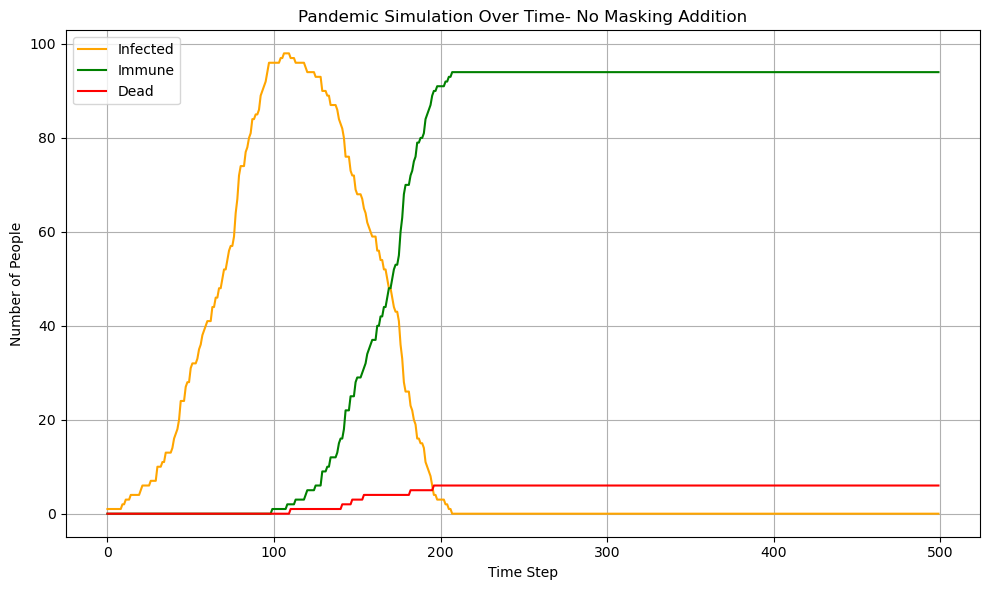

In [58]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(infected_counts, label='Infected', color='orange')
plt.plot(immune_counts, label='Immune', color='green')
plt.plot(dead_counts, label='Dead', color='red')
plt.xlabel("Time Step")
plt.ylabel("Number of People")
plt.title("Pandemic Simulation Over Time- No Masking Addition")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

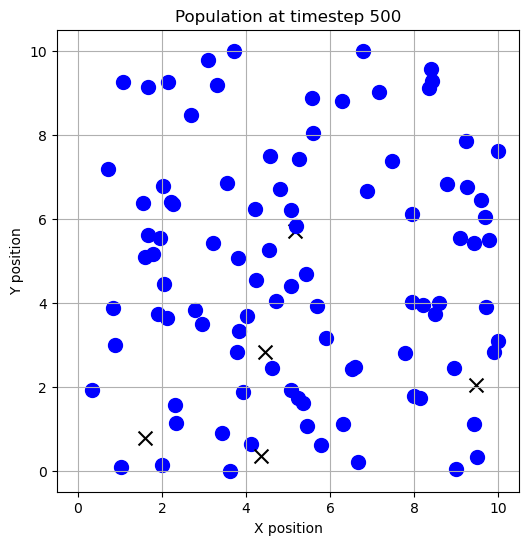

In [24]:
# Graphing the Grid after the simulation has been run

def plot_population(positions, infected, immune, dead, grid_size, timestep=None):
    plt.figure(figsize=(6, 6))
    for i in range(len(positions)):
        if dead[i]:
            color = 'black'
            marker = 'x'
        elif infected[i]:
            color = 'red'
            marker = 'o'
        elif immune[i]:
            color = 'blue'
            marker = 'o'
        else:
            color = 'green'
            marker = 'o'

        plt.scatter(positions[i][0], positions[i][1], c=color, marker=marker, s=100)

    plt.xlim(0, grid_size)
    plt.ylim(0, grid_size)
    plt.title(f"Population at timestep {timestep}" if timestep is not None else "Population State")
    plt.grid(True)
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-0.5, grid_size + 0.5)
    plt.ylim(-0.5, grid_size + 0.5)
    plt.show()
    
plot_population(positions, infected, immune, dead, grid_size, timestep=500)

In [69]:
# Now I am going to add the masking contribution

import numpy as np
import matplotlib.pyplot as plt
import time

# simulation parameters 
pop_size = 100             # number of people/population size
grid_size = 10             # grid size is 10x10 (the "box" my people are in)
timesteps = 500            # number of time steps to simulate (500 seems to be plenty based off final plot)
interaction_radius = 0.5   # how close people need to be to "interact"

# inputting my individual parameters 
infectious_rate = 0.60     # 60% chance to infect if exposed
mortality_rate = 0.05      # 5% chance to die during infection
recovery_time = 100        # recover after 100 time steps

# masking addition 
masking_enabled = True
mask_fraction = 0.5        # 50% of people wear masks- note: with the randomness added later on, its 50% ON AVERAGE

# lists to store properties of each person
positions = []          # [x, y]
velocities = []         # [vx, vy]
infected = [False] * pop_size
immune = [False] * pop_size
dead = [False] * pop_size
mask = [False] * pop_size
infection_timer = [0] * pop_size

side = int(np.sqrt(pop_size))  # assumes square root is exact
spacing = grid_size / side
margin = spacing / 2           # offset to avoid placing on borders- fixes issue of my people being right on the border

for i in range(pop_size):
    # Center people in grid cells with margin from the walls
    x = (i % side) * spacing + margin
    y = (i // side) * spacing + margin
    positions.append([x, y])

    # Assign small random velocities
    vx, vy = (np.random.randn(2) / 8).tolist()
    velocities.append([vx, vy])

    # Randomly assign masks
    mask[i] = np.random.rand() < mask_fraction if masking_enabled else False
    
initial_patient = np.random.randint(pop_size)
infected[initial_patient] = True
infection_timer[initial_patient] = 0

print(f"Initial infected person: {initial_patient}")
print(f"Total masked people: {sum(mask)}")

Initial infected person: 32
Total masked people: 52


In [70]:
infected_counts = []
immune_counts = []
dead_counts = []

for t in range(timesteps):
    # Move everyone
    for i in range(pop_size):
        if dead[i]:
            continue
        # Update position
        positions[i][0] += velocities[i][0]
        positions[i][1] += velocities[i][1]
        # Bounce off walls
        for d in range(2):
            if positions[i][d] < 0 or positions[i][d] > grid_size:
                velocities[i][d] *= -1
                positions[i][d] = max(0, min(grid_size, positions[i][d]))

    # Interactions between unique pairs
    for i in range(pop_size):
        if dead[i]:
            continue
        for j in range(i + 1, pop_size):
            if dead[j]:
                continue

            # Distance between people
            dx = positions[i][0] - positions[j][0]
            dy = positions[i][1] - positions[j][1]
            dist = np.sqrt(dx**2 + dy**2)

            if dist < interaction_radius:
                # Infection logic
                if infected[i] and not infected[j] and not immune[j]:
                    chance = infectious_rate * (0.1 if mask[j] else 1.0)
                    if np.random.rand() < chance:
                        infected[j] = True
                        infection_timer[j] = 0
                elif infected[j] and not infected[i] and not immune[i]:
                    chance = infectious_rate * (0.1 if mask[i] else 1.0)
                    if np.random.rand() < chance:
                        infected[i] = True
                        infection_timer[i] = 0

                # Simple velocity swap (elastic collision)
                velocities[i], velocities[j] = velocities[j], velocities[i]

    # Update infection status
    for i in range(pop_size):
        if infected[i]:
            infection_timer[i] += 1
            if infection_timer[i] >= recovery_time:
                if np.random.rand() < mortality_rate:
                    dead[i] = True
                    infected[i] = False
                else:
                    infected[i] = False
                    immune[i] = True

    # Track stats
    infected_counts.append(sum(infected))
    immune_counts.append(sum(immune))
    dead_counts.append(sum(dead))
    

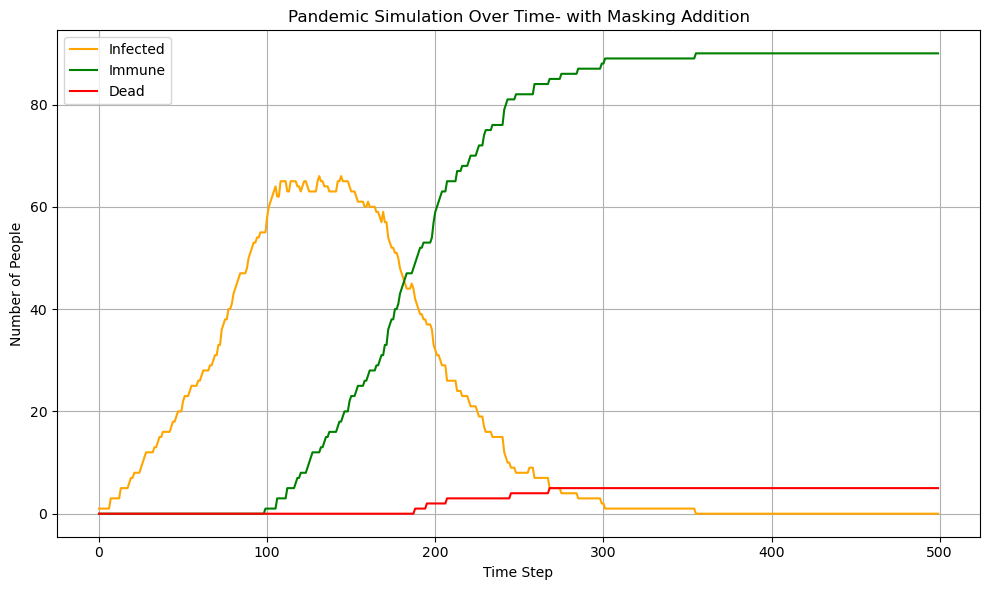

In [71]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(infected_counts, label='Infected', color='orange')
plt.plot(immune_counts, label='Immune', color='green')
plt.plot(dead_counts, label='Dead', color='red')
plt.xlabel("Time Step")
plt.ylabel("Number of People")
plt.title("Pandemic Simulation Over Time- with Masking Addition")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Trying something different to try to get data for no mask trial and mask trial simulatenously.. in the code above I 
#     have to manually add/delete code to get the two separate trials.. not efficient or smart

def run_simulation(masking_enabled=False, pop_size=100):

    N = pop_size
    grid_size = 10
    timesteps = 500
    interaction_radius = 0.5
    infectious_rate = 0.6
    mortality_rate = 0.05
    recovery_time = 100
    mask_fraction = 0.5

    positions = []
    velocities = []
    infected = [False] * N
    immune = [False] * N
    dead = [False] * N
    mask = [False] * N
    infection_timer = [0] * N

    side = int(np.sqrt(N))
    for i in range(N):
        x = (i % side) * (grid_size / side)
        y = (i // side) * (grid_size / side)
        positions.append([x, y])
        velocities.append((np.random.randn(2) / 8).tolist())
        mask[i] = np.random.rand() < mask_fraction if masking_enabled else False

    infected[np.random.randint(N)] = True

    # Data to track
    infected_counts = []
    immune_counts = []
    dead_counts = []

    for t in range(timesteps):
        for i in range(N):
            if dead[i]: continue
            positions[i][0] += velocities[i][0]
            positions[i][1] += velocities[i][1]
            for d in range(2):
                if positions[i][d] < 0 or positions[i][d] > grid_size:
                    velocities[i][d] *= -1
                    positions[i][d] = max(0, min(grid_size, positions[i][d]))

        for i in range(N):
            if dead[i]: continue
            for j in range(i + 1, N):
                if dead[j]: continue
                dx = positions[i][0] - positions[j][0]
                dy = positions[i][1] - positions[j][1]
                dist = np.sqrt(dx**2 + dy**2)
                if dist < interaction_radius:
                    if infected[i] and not infected[j] and not immune[j]:
                        chance = infectious_rate * (0.1 if mask[j] else 1.0)
                        if np.random.rand() < chance:
                            infected[j] = True
                            infection_timer[j] = 0
                    elif infected[j] and not infected[i] and not immune[i]:
                        chance = infectious_rate * (0.1 if mask[i] else 1.0)
                        if np.random.rand() < chance:
                            infected[i] = True
                            infection_timer[i] = 0
                    velocities[i], velocities[j] = velocities[j], velocities[i]

        for i in range(N):
            if infected[i]:
                infection_timer[i] += 1
                if infection_timer[i] >= recovery_time:
                    if np.random.rand() < mortality_rate:
                        dead[i] = True
                        infected[i] = False
                    else:
                        infected[i] = False
                        immune[i] = True

        infected_counts.append(sum(infected))
        immune_counts.append(sum(immune))
        dead_counts.append(sum(dead))

    return infected_counts, immune_counts, dead_counts

# Run simulation without masking
infected_no_mask, _, dead_no_mask = run_simulation(masking_enabled=False)

# Run simulation with masking
infected_masked, _, dead_masked = run_simulation(masking_enabled=True)

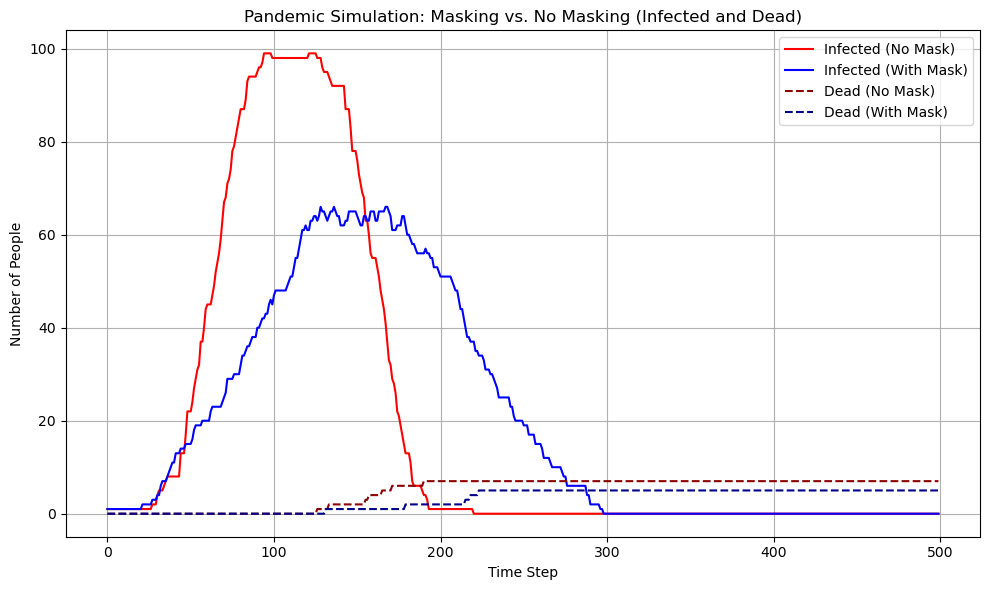

In [52]:
plt.figure(figsize=(10, 6))

# Infection curves
plt.plot(infected_no_mask, label='Infected (No Mask)', color='red')
plt.plot(infected_masked, label='Infected (With Mask)', color='blue')

# Death curves
plt.plot(dead_no_mask, label='Dead (No Mask)', color='darkred', linestyle='--')
plt.plot(dead_masked, label='Dead (With Mask)', color='darkblue', linestyle='--')

# Labels and formatting
plt.xlabel("Time Step")
plt.ylabel("Number of People")
plt.title("Pandemic Simulation: Masking vs. No Masking (Infected and Dead)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("masking_vs_nomask_with_deaths.png")  # for LaTeX report
plt.show()